<a href="https://colab.research.google.com/github/SarahJane86/Project2/blob/main/Project_2_HeartFailure(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2 - Part 1 (Core)
### Sarah Musselwhite
#### August 27, 2022

### First choice: Heart Failure 





In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')

1) Source of data

##### https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [2]:
heart_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ0gjToMQ5DRQ4Q5uok5ADJf_1cZDD8eGUNNLsSpz_pYQ3SLYZsOYsrjEaBjXEbGdfXzduFznLZXfF7/pub?gid=1116141808&single=true&output=csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### 2) Brief description of data

##### Heart disease is one of the most leading causes of death globally taking an estimated 17.9 million lives per year. Heart failure is a common event caused by a Cardiovascular Disease. Most can be prevented by addressing certain behaviors, such as smoking, physical health, and alcohol use.

##### People with CVD or have a risk of developing CVD, need early detection and insight on how to manage it. 

####3) What is the target?
###### Target will be "Death Event"

#### 4) Is this a classification or regression problem?

###### Classification, because I will be exploring what factors contribute to Death events, is it a compilation of many things? Or something different.

####5) How many features?

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



#####6) How many rows of data.




In [4]:
 len(heart_df.index)

299

#### 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

##### In cleaning, I forsee a bit of time consumption, due to the fact of trying to narrow down what aspects to keep, and what to drop. What counts more toward the target. I'm honestly excited to explore this data, as much of my family history, most in my family tree has been affected by some sort of cardiac health issue.

## Project 2- Part 2
#### 9/6/22

#### About the data:
* **age:** Age of the patient

* **anaemia:** If the patient had the haemoglobin below the normal range

* **diabetes:** If the patient was diabetic

* **high_blood_pressure:** If the patient had hypertension

* **sex:** The sex of the patient
* **smoking:** If the patient smokes actively or ever did in past
*  **time:** It is the time of the patient's follow-up visit for the disease in months
* **DEATH_EVENT:** If the patient deceased during the follow-up period

### *- Dropped columns:*
* **ejection_fraction:** Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* **creatinine_phosphokinase:** The level of the creatine phosphokinase in the blood in mcg/L
* **platelets:** Platelet count of blood in kiloplatelets/mL
* **serum_creatinine:** The level of serum creatinine in the blood in mg/dL
* **serum_sodium:** The level of serum sodium in the blood in mEq/L

In [5]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
heartfail = heart_df.drop(columns = ['ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium'])

In [7]:
heartfail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   diabetes             299 non-null    int64  
 3   high_blood_pressure  299 non-null    int64  
 4   sex                  299 non-null    int64  
 5   smoking              299 non-null    int64  
 6   time                 299 non-null    int64  
 7   DEATH_EVENT          299 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 KB


In [8]:
# Identifying any missing values
heartfail.isna().sum()

age                    0
anaemia                0
diabetes               0
high_blood_pressure    0
sex                    0
smoking                0
time                   0
DEATH_EVENT            0
dtype: int64

In [9]:
# Identifying any duplicates
heartfail[heartfail.duplicated(keep = False)]

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
233,53.0,1,0,0,1,1,209,0
234,53.0,1,0,0,1,1,209,0


In [10]:
heartfail.drop_duplicates(inplace = True)

  ###### There are no categorical values. I did check for inconsistencies in all columns and found none. 

In [11]:
heartfail['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000     9
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

In [12]:
heartfail['anaemia'].value_counts()

0    170
1    128
Name: anaemia, dtype: int64

In [13]:
heartfail['diabetes'].value_counts()

0    173
1    125
Name: diabetes, dtype: int64

In [14]:
heartfail['high_blood_pressure'].value_counts()

0    193
1    105
Name: high_blood_pressure, dtype: int64

In [15]:
heartfail['sex'].value_counts()

1    193
0    105
Name: sex, dtype: int64

In [16]:
heartfail['smoking'].value_counts()

0    203
1     95
Name: smoking, dtype: int64

In [17]:
heartfail['time'].value_counts()

250    7
187    7
107    6
10     6
186    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

In [18]:
heartfail['DEATH_EVENT'].value_counts()

0    202
1     96
Name: DEATH_EVENT, dtype: int64

#### Univariate visuals

- I chose box plots for the columns that had multiple variables.

- I chose histograms for the columns that had ordinal values. 

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
heartfail.describe()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,60.860181,0.429530,0.419463,0.352349,0.647651,0.318792,129.996644,0.322148
std,11.906114,0.495842,0.494301,0.478506,0.478506,0.466792,77.609941,0.468085
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,0.000000,0.000000,1.000000,0.000000,114.000000,0.000000
75%,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,285.000000,1.000000


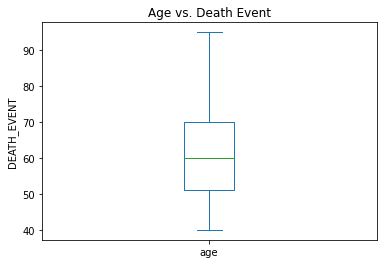

In [21]:
heartfail['age'].plot(kind='box')
plt.title('Age vs. Death Event')
plt.ylabel('DEATH_EVENT');
plt.show()

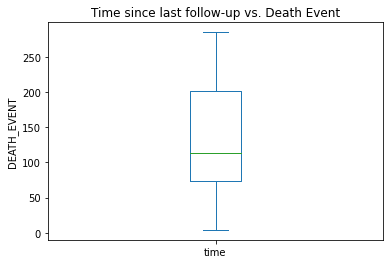

In [22]:
heartfail['time'].plot(kind='box')
plt.title('Time since last follow-up vs. Death Event')
plt.ylabel('DEATH_EVENT');
plt.show()

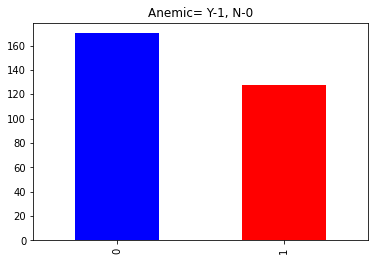

In [23]:
anemic= heartfail['anaemia'].value_counts()

#Let's give it some color
anemic.plot(kind = 'bar', color = ['blue','red'])
plt.title('Anemic= Y-1, N-0')
plt.show()

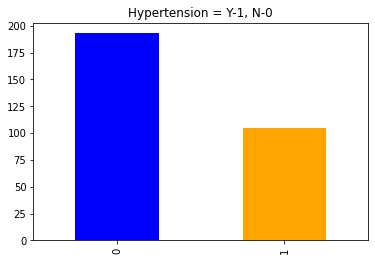

In [24]:
Hypertension = heartfail['high_blood_pressure'].value_counts()

#Let's give it some color
Hypertension.plot(kind = 'bar', color = ['blue','orange'])
plt.title('Hypertension = Y-1, N-0')
plt.show()

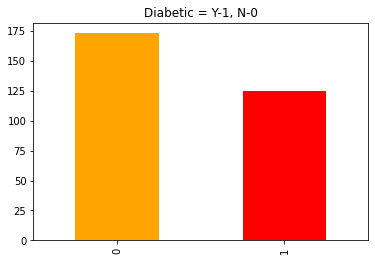

In [25]:
Diabetic= heartfail['diabetes'].value_counts()

#Let's give it some color
Diabetic.plot(kind = 'bar', color = ['orange','red'])
plt.title('Diabetic = Y-1, N-0')
plt.show()

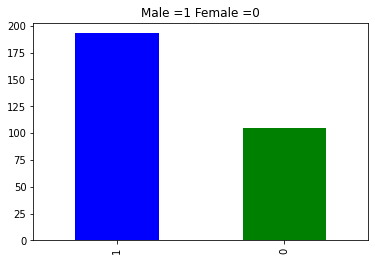

In [26]:
Gender= heartfail['sex'].value_counts()

#Let's give it some color
Gender.plot(kind = 'bar', color = ['blue','green'])
plt.title('Male =1 Female =0')
plt.show()

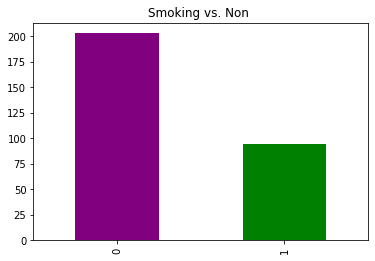

In [27]:
smoke= heartfail['smoking'].value_counts()

smoke.plot(kind = 'bar', color = ['purple','green'])
plt.title('Smoking vs. Non ')
plt.show()

### Project Part 3
9/14/2022

###### For this part of the project, you will continue your EDA by:
- Identifying any moderate or strong correlations between your target and your features and/or between one feature and another
- Creating multivariate exploratory visuals to further understand your data

- From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

In [28]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# Calculate the correlation/strength-of-association of features
# in a data-set with dython
from dython.nominal import associations

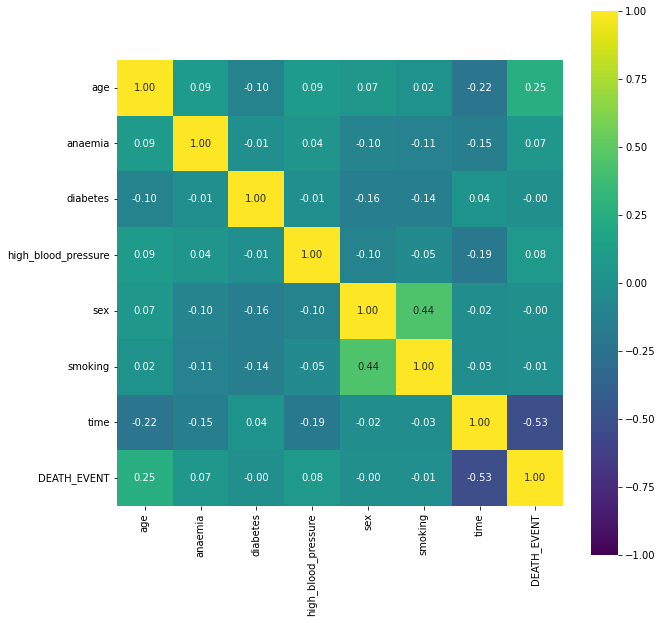

{'corr':                           age   anaemia  diabetes  high_blood_pressure  \
 age                  1.000000  0.090815 -0.103088             0.091810   
 anaemia              0.090815  1.000000 -0.009496             0.041144   
 diabetes            -0.103088 -0.009496  1.000000            -0.014856   
 high_blood_pressure  0.091810  0.041144 -0.014856             1.000000   
 sex                  0.067168 -0.097908 -0.155967            -0.102985   
 smoking              0.021981 -0.113546 -0.143721            -0.052355   
 time                -0.222367 -0.145904  0.036724            -0.194444   
 DEATH_EVENT          0.252591  0.069127 -0.003907             0.077786   
 
                           sex   smoking      time  DEATH_EVENT  
 age                  0.067168  0.021981 -0.222367     0.252591  
 anaemia             -0.097908 -0.113546 -0.145904     0.069127  
 diabetes            -0.155967 -0.143721  0.036724    -0.003907  
 high_blood_pressure -0.102985 -0.052355 -0.194444 

In [30]:
# Calculate the correlation/strength-of-association of features in data-set 
# with both categorical and continuous features using:
# - Pearson's R for continuous-continuous cases
# - Correlation Ratio for categorical-continuous cases 
# - Cramer's V or Theil's U for categorical-categorical cases
associations(heartfail, 
             figsize=(10,10), 
             cmap='viridis')

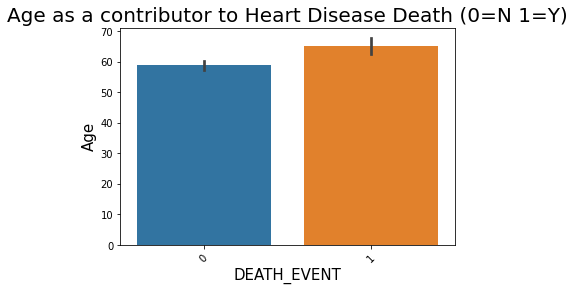

In [61]:
sns.barplot(data=heartfail, x='DEATH_EVENT', y='age')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Age as a contributor to Heart Disease Death (0=N 1=Y)', fontsize=20)
plt.xlabel('DEATH_EVENT', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xticks(rotation = 45);

As we can see in the bar plot above, many older patients who were experiencing heart failure seemed to have a higher death rate.

In [ ]:
heartfailgrp =heartfail.groupby('age').mean()
heartfailgrp

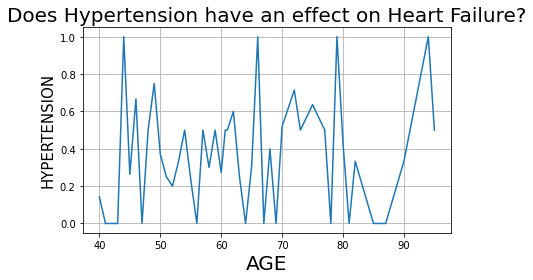

In [79]:
#group the data by year
heartfail_grp = heartfail.groupby('age').mean().reset_index()

#Create figure
fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(heartfail_grp['age'], heartfail_grp['high_blood_pressure'])
axes.set_title('Does Hypertension have an effect on Heart Failure?', fontsize=20)
axes.set_ylabel('HYPERTENSION', fontsize=15)
axes.set_xlabel("AGE", fontsize=20)
axes.ticklabel_format(style = 'plain')
axes.grid()

plt.tight_layout()
plt.savefig('/content/EffectofYearonPricedata.png')
plt.show()

This visual shows that blood pressure seems to have an effect on causing death in a heart failure patient. The trend varies quite a bit, inicating that there could be other variables to contribute as well. 